# **Command 실습**

# alias

자주 사용하는 명령어를 별칭으로 설정해 간단하게 실행할 수 있게 해주는 명령어

## 사용법

``` shell
alias 별칭[=명령어]
```

#### alias 설정
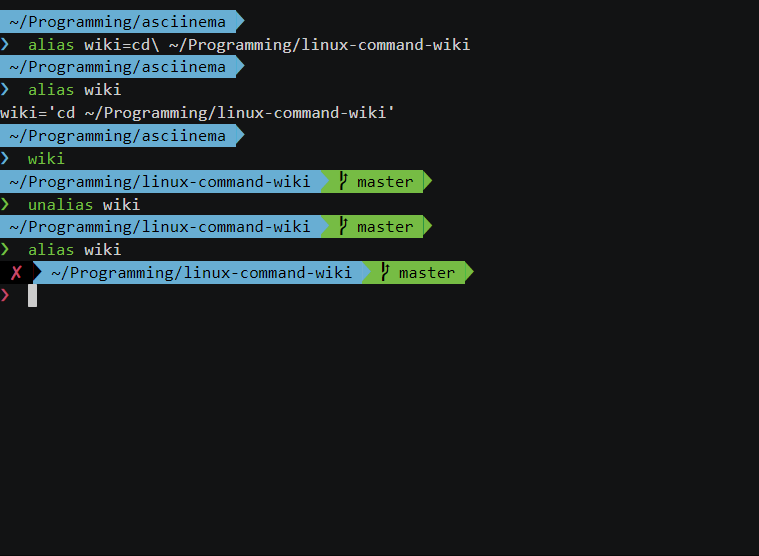
``` shell
❯ alias wiki='cd ~/Programming/linux-command-wiki/alias'
```

#### 설정한 alias 조회

``` shell
❯ alias wiki
wiki=/Users/hong/Programming/linux-command-wiki/alias
```

설정한 alias를 터미널에 입력하면  사용할 수 있음

``` shell
❯ wiki
```

#### alias 조회

현재 시스템에 설정된 모든 alias를 조회 (기본적으로 시스템에서 설정된 alias도 존재함)

``` shell
❯ alias
-='cd -'
...
md='mkdir -p'
wiki=/Users/hong/Programming/linux-command-wiki/alias
```

#### alias 해제

``` shell
unalias wiki
```

#### alias 영구 적용

alias 명령어로 별칭을 설정하면 **현재 사용 중인 shell만 적용되기 때문에 shell이 종료되면 alias도 해제**됨  
alias를 영구적으로 설정하고 싶다면 아래와 같이 적용

1. 특정 계정에만 적용
    * 사용자의 홈폴더(~)에 현재 사용 중인  shell의 profile에 alias 설정

2. 모든 사용자 계정에 적용
    * /etc/porfile에 alias 설정

``` shell
# 1) .bash_profile을 열어 alias를 설정하고 저장하면 로그인시 마다 alias가 적용되어 있음
❯ vim ~/.bash_profile 
원하는 alias 설정
❯ source ~/.bash_profile # 즉시 적용

# 모든 사용자에게 적용하고 싶다면 /etc/profile을 열어 1)과 동일한 방법으로 설정
❯ sudo vim /etc/profile
원하는 alias 설정
❯ source /etc/profile
```


# man

리눅스 명령어의 사용법, 옵션 등 매뉴얼을 볼 수 있는 명령어

## 사용법

> man [옵션] 이름...

더 많은 명령어가 있지만, 유용한 명령어 위주로 정리

| 옵션 	| 설명 	|
|:----:	|:------------------------- |
| -a 	| 이름으로 검색된 매뉴얼 페이지 모두 출력 |
| -h 	| man 명령어 사용법 출력 |
| -f 	| whatis 명령어와 동일하며, 설명에 일치하는 단어(전체가 일치)가 있는 매뉴얼 페이지 출력 |
| -k 	| apropos 명령어와 동일하며, 설명에 일치하는 단어(일부분 일치해도됨)만 가 있는 매뉴얼 페이지 출력 |
| -K 	| 매뉴얼 페이지 전체에서 일치하는 문자가 있는 명령어를 모두 출력 |
| -w 	| 명령어의 매뉴얼 페이지 경로 출력 |
| -P pager    | 매뉴얼 페이지 출력시 페이징 방식을 정할 수 있음. 환경변수 PAGER에 설정된 값으로 출력하며, 기본적으로 PAGER는 less 명령어. 다른 방법을 쓰고 싶다면 MANPAGEG 환경변수에 값을 입력하면 매뉴얼 페이지를 열 때마다 해당 페이징 방식이 사용됨 |
| -S number | 해당 섹션 내의 이름과 일치하는 명령어의 매뉴얼 페이지 출력 |


``` shell
# rm 명령어의 매뉴얼 페이지 출력
❯ man rm
RM(1)                    User Commands                               RM(1)

NAME
       rm - remove files or directories

SYNOPSIS
       rm [OPTION]... [FILE]...

DESCRIPTION
       This manual page documents the GNU version of rm.  rm removes each specified file.  By default, it does not remove directories.

       If  the  -I or --interactive=once option is given, and there are more than three files or the -r, -R, or --recursive are given, then rm prompts the user for whether to proceed with the entire
       operation.  If the response is not affirmative, the entire command is aborted.

       Otherwise, if a file is unwritable, standard input is a terminal, and the -f or --force option is not given, or the -i or --interactive=always option is given, rm prompts the user for whether
       to remove the file.  If the response is not affirmative, the file is skipped.
...
```

### 섹션(section)

RM(1) 과 같이 가로 안에 쓰여진 번호는 명령어의 섹션 번호를 뜻함

```
   1   실행 가능한 프로그램 또는 쉘 명령어
   2   시스템 호출 (커널에서 제공하는 함수)
   3   라이브러리 호출 (프로그램 라이브러리 안의 함수)
   4   /dev 경로에 위치하는 특수 파일
   5   파일 포맷이나 규칙 (passwd)
   6   게임
   7   잡다한 파일 (매크로 패키지와 규칙 포함), man(7), groff(7)와 같은 명령어
   8   루트 권한을 통한 시스템 관리 명령어
   9   표준이 아닌 커널 루틴
```

섹션마다 동일한 명령어가 존재할 수 있음

``` shell
# 5번 섹션의 passwd 매뉴얼 페이지 출력
❯ man -S 5 passwd
```

### PAGER

`-P` 옵션을 쓰면 매뉴얼 페이지를 표시할 때 페이징 방식을 설정할 수 있음

``` shell
# head 명령어를 통해 rm 명령어의 매뉴얼 페이지 출력
❯ man -P head rm
```

`MANPAGER` 환경변수를 설정해두면 매뉴얼 페이지를 열 때마다 설정한 페이징 방식을 사용

``` shell
# 기본적으로 사용하는 페이징 방식은 PAGER 변수에 설정되어있음
❯ echo $PAGER
less

# 새로운 페이징 방식을 MANPAGER에 설정하면 페이징 방식을 재정의할 수 있음
❯ export MANPAGER=head
# head 방식으로 매뉴얼 페이지 출력
❯ man rm
```


# sort

텍스트 데이터 또는 라인, 바이너리 파일을 정렬하는 명령어

## 사용법

``` shell
sort [옵션] [file...]
```

| 옵션                 | 설명 |
|----------------------|------|
| -f, --ignore-case    | 모든 소문자를 대문자로 변경해서 정렬 (대소문자 상관없이 정렬) |
| -u, --unique         | 중복 제거 |
| -r, --reverse        | 역순으로 정렬 |
| -R, --random-sort, --sort=random | 랜덤으로 정렬 |
| -k field1.. --key=field... | 필드 포지션을 기준으로 정렬 |
| -t char, --field-separator=char | 필드 구분자 설정 |
| -n                         | 숫자 정렬 |
| -k number                  | 정렬 필드 선택 (1부터 시작) |
| -o file, --output file     | 지정한 파일에 저장 |


### 파일 정렬

``` shell
# Number.txt 정렬하기
$ sort Number.txt
# 또는
$ cat Number.txt | sort
```

### ls 결과 정렬

``` shell
# 파일 크기 순으로 정렬하기 (파일 크기가 공백을 기준으로 5번쨰 필드에 위치)
$ ls -al | sort -k5
```

``` bash
$ cat sort.txt
a,b,c
b,a,f
c,c,d

# 구분자 ',' 로 나눈 후, 2번째 필드값 기준 정렬
$ sort -t ',' -k 2 sort.txt
b,a,f
a,b,c
c,c,d
```
